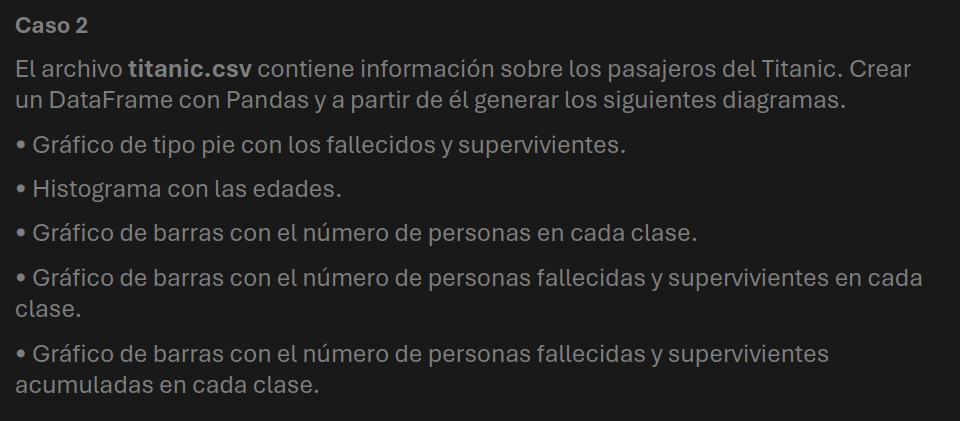

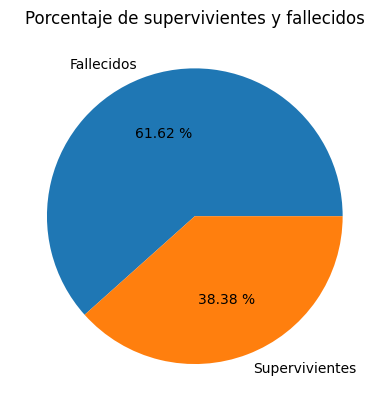

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("tita.csv")
df["Survived"].value_counts().plot(kind='pie', autopct='%1.2f %%', labels=['Fallecidos', 'Supervivientes'], title = 'Porcentaje de supervivientes y fallecidos', ylabel='')
plt.show()

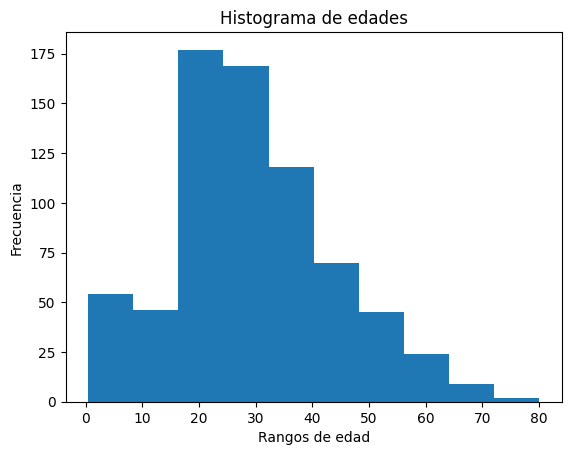

In [15]:
df["Age"].plot(kind='hist', title = 'Histograma de edades', xlabel='Rangos de edad', ylabel='Frecuencia')
plt.show()

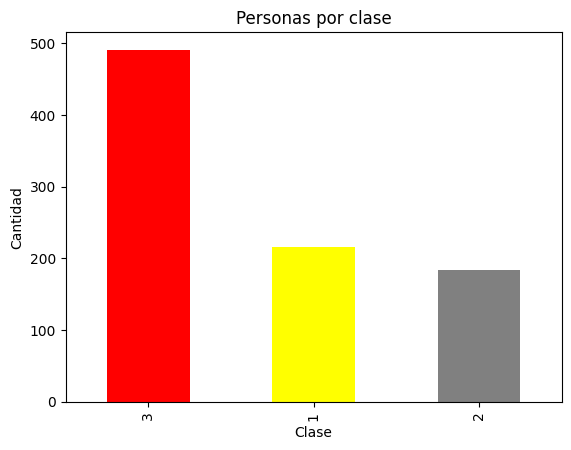

In [18]:
df["Pclass"].value_counts().plot(kind='bar', title = 'Personas por clase', ylabel='Cantidad', xlabel='Clase', color=['red', 'yellow', 'gray'])
plt.show()

<Axes: title={'center': 'Supervivientes y fallecidos por clase'}, xlabel='Clase', ylabel='Cantidad'>

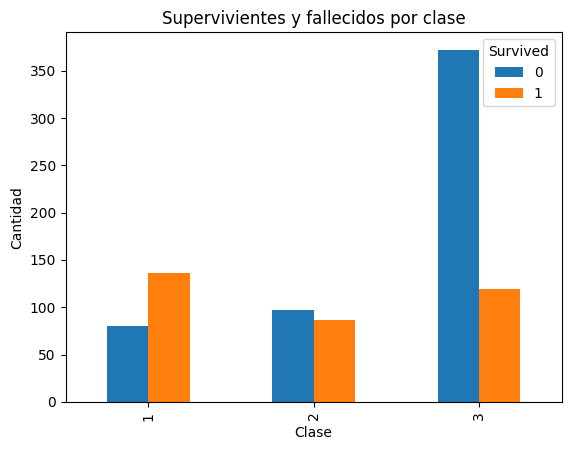

In [26]:
df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar',  title='Supervivientes y fallecidos por clase', ylabel ='Cantidad', xlabel='Clase')

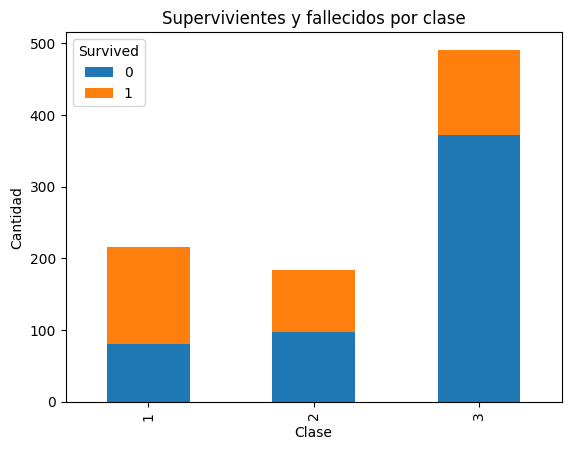

In [27]:
df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar',  title='Supervivientes y fallecidos por clase', ylabel ='Cantidad', xlabel='Clase', stacked =True)
plt.show()

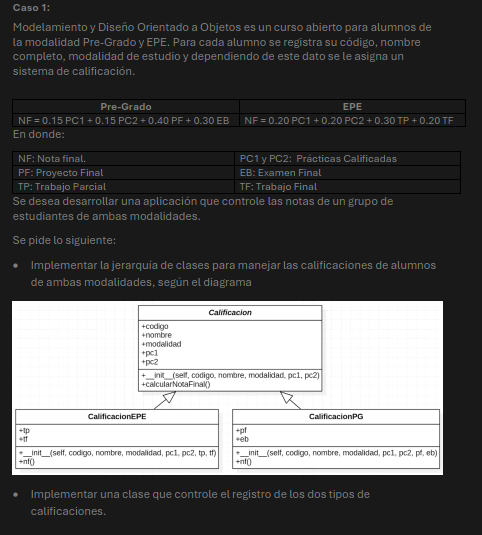

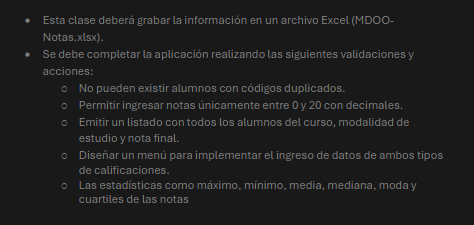

In [32]:
from abc import abstractmethod
import random as r
import pandas as pd
nombres = ["Pecy", "Juan", "Lucas", "Pedro", "Ana", "Maria", "Lucia", "Merlina", "Karen"]

class Calificacion:
  def __init__(self, codigo, nombre, modalidad, pc1, pc2):
    self._codigo = codigo
    self._nombre = nombre
    self._modalidad = modalidad
    self._pc1 = pc1
    self._pc2 = pc2
  def __str__(self):
    return f"Codigo: {self._codigo}\nNombre: {self._nombre}\nModalidad: {self._modalidad}\nPC1: {self._pc1 }\nPC2: {self._pc2}"
  @abstractmethod
  def calcular_nota_final(self):
    pass
  def to_dic(self):
    return {
        "Codigo": self._codigo,"Nombre": self._nombre,"Modalidad": self._modalidad, "PC1": self._pc1,"PC2": self._pc2
    }
class CalificacionEPE(Calificacion):
  def __init__(self, codigo, nombre, modalidad, pc1, pc2, tp, tf):
    super().__init__(codigo, nombre, modalidad, pc1, pc2)
    self.__tp = tp
    self.__tf = tf
  def __str__(self):
    return super().__str__() + f"\nTP: {self.__tp}\nTF: {self.__tf}"
  def calcular_nota_final(self):
    return super()._pc1 * 0.2+ super()._pc2*0.30+ self.__tp *0.2+ self.__tf * 0.2
  def to_dic(self):
    dicci = super().to_dic()
    dicci["TP"] = self.__tp
    dicci["TF"] = self.__tf
    return dicci
class CalificacionPG(Calificacion):
  def __init__(self, codigo, nombre, modalidad, pc1, pc2, pf, eb):
    super().__init__(codigo, nombre, modalidad, pc1, pc2)
    self.__pf = pf
    self.__eb = eb
  def __str__(self):
    return super().__str__() + f"\nPF: {self.__pf}\nEB: {self.__eb}"
  def calcular_nota_final(self):
    return super()._pc1 * 0.15+ super()._pc2*0.15+ self.__pf *0.4+ self.__eb * 0.3
  def to_dic(self):
    dicci = super().to_dic()
    dicci["PF"] = self.__pf
    dicci["EB"] = self.__eb
    return dicci
class Controladora:
  def __init__(self):
    self.__calificaciones = []
  def menu(self):
    op = -1
    while op != 0:
      print("1. Agregar nota PG\n2. Agregar nota EPE\n3. Listar alumnos\n4. Exportar excel y generar estadisticas\n0. Salir")
      op = -1
      while not(op >=0 and op <= 4):
        op = int (input("Ingresa la opcion"))
      if op == 1:
        self.__calificaciones.append(CalificacionPG(r.randint(100, 300), r.choice(nombres), r.choice(["Virtual", "Presencial"]), r.uniform(0, 20.0),  r.uniform(0, 20.0),  r.uniform(0, 20.0),  r.uniform(0, 20.0)))
      elif op == 2:
        self.__calificaciones.append(CalificacionEPE(r.randint(100, 300), r.choice(nombres), r.choice(["Virtual", "Presencial"]),  r.uniform(0, 20.0),  r.uniform(0, 20.0),  r.uniform(0, 20.0),  r.uniform(0, 20.0)))
      elif op == 3:
        for alum in self.__calificaciones:
          print(alum)
      elif op == 4:
        diccis = []
        for alum in self.__calificaciones:
          diccis.append(alum.to_dic())
        df = pd.DataFrame(diccis)
        df.to_excel("MDOO-Notas.xlsx", index =False)
        df.drop(columns=["Codigo"], inplace=True)
        print(df.describe())

contro = Controladora()
contro.menu()


1. Agregar nota PG
2. Agregar nota EPE
3. Listar alumnos
4. Exportar excel y generar estadisticas
0. Salir
Ingresa la opcion1
1. Agregar nota PG
2. Agregar nota EPE
3. Listar alumnos
4. Exportar excel y generar estadisticas
0. Salir
Ingresa la opcion1
1. Agregar nota PG
2. Agregar nota EPE
3. Listar alumnos
4. Exportar excel y generar estadisticas
0. Salir
Ingresa la opcion2
1. Agregar nota PG
2. Agregar nota EPE
3. Listar alumnos
4. Exportar excel y generar estadisticas
0. Salir
Ingresa la opcion2
1. Agregar nota PG
2. Agregar nota EPE
3. Listar alumnos
4. Exportar excel y generar estadisticas
0. Salir
Ingresa la opcion3
Codigo: 178
Nombre: Pedro
Modalidad: Presencial
PC1: 18.405639401562752
PC2: 6.5302398419712055
PF: 16.10137661650855
EB: 14.123491757353362
Codigo: 107
Nombre: Lucas
Modalidad: Virtual
PC1: 0.8632542350196548
PC2: 5.613121687944158
PF: 0.40723929052144836
EB: 9.999770017496683
Codigo: 107
Nombre: Lucas
Modalidad: Presencial
PC1: 5.98255717891087
PC2: 6.37320295164799